Recommendation image.avif




# **Project: Amazon Product Recommendation System**

## **A Recommendation Systems Project.**

## **By Ibor Elvis, Data Scientist, Certified by MIT Schwarzman College of Computing**

### **(To verify this certificate visit verify.mygreatlearning.com/MKKOWHSQ)**



**Welcome to the project on Recommendation Systems. I worked with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.**

--------------
## **Context:**
--------------
Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

As a Data Science Scientist at Amazon (presumably),  the task of building a recommendation system to recommend products to customers based on their previous ratings for other products is given. I have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, I used **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162991 sha256=19a6dea4a98d5f8a8ccf8861a90324d7c41304194b4be046135834210707cd52
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [3]:
# Basic python libraries
import numpy as np
import pandas as pd

# Python libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df_copy**

In [4]:
# Importing the dataset

# Specify header=None because the CSV file does not contain column headers
df = pd.read_csv("/content/drive/MyDrive/Recommendation Systems/ratings_Electronics.csv", header = None)

df.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] # Adding column names

df = df.drop('timestamp', axis = 1) # Dropping timestamp

df_copy = df.copy(deep = True) # Copying the data to another DataFrame

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [5]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [6]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [7]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [8]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [9]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **The number of rows and columns and observations.**

In [10]:
# Check the number of rows and columns and provide observations

df_final.shape



(65290, 3)

###**Observation :**
There are 65290 rows and 3 columns

### **Data types**

In [11]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1310 to 7824427
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


### **Observation**

The 'user_id' and 'prod_id' columns are of type object, indicating that they likely contain categorical data such as strings.

The 'rating' column is of type float64, suggesting it contains numerical data.

All three columns have non-null counts equal to the total number of entries (65,290), indicating no missing values in the DataFrame.

Moreso, The DataFrame has a total of 65,290 entries (rows).

The index appears to be of type Int64Index, and the entries range from 1310 to 7824427.

There are three columns in the DataFrame.

### **Checking for missing values**

In [12]:
# Check for missing values present and provide observations
df_final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

###**Observations:**

 All columns ('user_id', 'prod_id', and 'rating') have zero missing values, which is good. It means that each column in the DataFrame has a complete set of values, and we don't need to handle any missing data during the analysis. If there were missing values, we might have needed to decide on an appropriate strategy for dealing with them, such as imputation or removal.

### **Summary Statistics**

In [13]:
# Summary statistics of 'rating' variable and provide observations
df_final.describe().T


,count,mean,std,min,25%,50%,75%,max
rating,65290.0,4.294808,0.988915,1.0,4.0,5.0,5.0,5.0


### **Observations:**
There are 65,290 entries in the 'rating' column, indicating the total number of ratings available.

The mean (average) rating is approximately 4.29.

The standard deviation is approximately 0.99. The low standard deviation indicates that the ratings are closer to the mean.

The minimum rating in the dataset is 1.0.

25% (25th Percentile (25%)) of the ratings fall below or equal to 4.0. This is the first quartile.

50th Percentile (50% or Median): 50% of the ratings fall below or equal to 5.0. This is the median value.

75th Percentile (75%): 75% of the ratings fall below or equal to 5.0. This is the third quartile.

The maximum rating in the dataset is 5.0.

The summary statistics provide a snapshot of the distribution and central tendency of the 'rating' values in the dataset. It can be seen that the majority of ratings are high, with a mean close to the upper limit of 5.0

### **Checking the rating distribution**

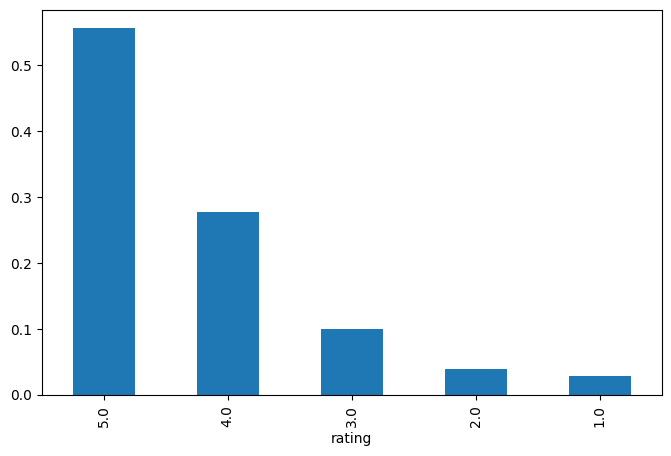

In [14]:
# Create the bar plot and provide observations
plt.figure(figsize=(8,5))
df_final["rating"].value_counts(1).plot(kind = "bar")
plt.show()

### **observations**
The distribution is centered around 5.0, which is the highest rating possible.

The distribution is right-skewed. This means that there are more ratings on the higher end (towards 5.0) than on the lower end (towards 1.0). This is confirmed by the fact that the median (5.0) is larger than the mean (4.29).

We can also see from the chart that most of the ratings fall between 4.0 and 5.0. The bar heights decrease significantly as the rating goes lower. There are very few ratings below 3.0.

In conclusion, the data suggests that most people who rated something found it to be positive or above average.

### **Checking the number of unique users and items in the dataset**

In [15]:
# Number of total rows in the data and number of unique user id and product id in the data
print('The total number of rows in the final data = ', len(df_final))
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].nunique())


The total number of rows in the final data =  65290
Number of unique USERS in Raw data =  1540
Number of unique ITEMS in Raw data =  5689


### **Observations:**

The dataset has a total of 65,290 rows, indicating the number of observations or interactions between users and items in it.

There are 1,540 unique users in the raw data.

There are 5,689 unique items in the raw data.

### **Users with the most number of ratings**

In [16]:
# Top 10 users based on the number of ratings
top_users = df_final['user_id'].value_counts().head(10)

# Display the result
print("Top 10 users based on the number of ratings:")
print(top_users)


Top 10 users based on the number of ratings:
user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A1UQBFCERIP7VJ    193
A22CW0ZHY3NJH8    193
AWPODHOB4GFWL     184
AGVWTYW0ULXHT     179
Name: count, dtype: int64


### **Observations**

The user with the ID 'ADLVFFE4VBT8' has the highest number of ratings, totaling 295. This user is the most prolific in terms of providing ratings.

The count of ratings for the top 10 users ranges from 179 to 295, indicating a diverse range of user engagement.

Users 'A3OXHLG6DIBRW8' and 'A1ODOGXEYECQQ8' are among the top-rated users, contributing 230 and 217 ratings, respectively.

The top-rated users could be valuable for analysis and may provide insights into popular or frequently purchased items.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [17]:
df_final.head() # reviewing our dataset for details

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [18]:
# Calculate the average rating for each product
average_ratings = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame(df_final.groupby('prod_id')['rating'].agg(['mean', 'count']).rename(columns={'mean': 'average_rating', 'count': 'rating_count'}))


# Sort the dataframe by average of ratings in the descending order
final_rating_sorted = final_rating.sort_values(by='average_rating', ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head()

,average_rating,rating_count
prod_id,,
1400501466,3.333333,6
1400532655,3.833333,6
1400599997,4.000000,5
9983891212,4.875000,8
B00000DM9W,5.000000,5


In [19]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count'] >= min_interaction]

    # Sorting values with respect to average rating in descending order
    recommendations = recommendations.sort_values(by='average_rating', ascending=False)

    return recommendations.index[:n]


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [20]:
# Using the top_n_products function to recommend top 5 products
rec = top_n_products(final_rating, n=5, min_interaction=50)

# Display the recommended products
print("The top 5 products with 50 minimum interactions based on populaity are :\n", rec)


The top 5 products with 50 minimum interactions based on populaity are :
 Index(['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW'], dtype='object', name='prod_id')


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [21]:
# using the top_n_products function to recommend top 5 products with at least 100 interactions
rec = top_n_products(final_rating, n=5, min_interaction=100)

# display the recommended products
print("The top 5 products with 100 minimum interactions based on populaity are :\n", rec)

The top 5 products with 100 minimum interactions based on populaity are :
 Index(['B003ES5ZUU', 'B000N99BBC', 'B002WE6D44', 'B007WTAJTO', 'B002V88HFE'], dtype='object', name='prod_id')


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [22]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [23]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [24]:
# checking our dataset for consistency
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [25]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)


Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [26]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
                'user_based': True}

# Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)  # Call the function to perform the evaluation


RMSE: 1.0012
Precision:  0.855
Recall:  0.858
F_1 score:  0.856


### **Observations**

RMSE (Root Mean Squared Error):

Value: 1.0012
This is a very low RMSE value, close to 1. In recommender systems, RMSE measures the average magnitude of the difference between predicted ratings and actual ratings. A lower RMSE generally indicates better model performance.

Precision:

Value: 0.855
This is a high precision value, indicating that 85.5% of the items recommended by the model were actually relevant to the users (ratings above the threshold of 3.5).

Recall:

Value: 0.858
This is also a high recall value, suggesting that the model captured 85.8% of the relevant items (ratings above 3.5) and recommended them to users.

F1-score:

Value: 0.856
This score, derived from precision and recall, confirms a good balance between the two metrics.

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [27]:
# Predicting rating for a sample user with an interacted product
sim_user_user.predict("A2XIOXRRYX0KZY", "1400501466", r_ui = 5, verbose = True)

user: A2XIOXRRYX0KZY item: 1400501466 r_ui = 5.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}


Prediction(uid='A2XIOXRRYX0KZY', iid='1400501466', r_ui=5, est=5, details={'actual_k': 1, 'was_impossible': False})

### **Observations**

The model predicted a rating of 5.00 for the item 1400501466 by the user A2XIOXRRYX0KZY.

The actual rating provided by the user for this item is also 5.00.
The prediction was not flagged as impossible, and it was based on the ratings of 1 nearest neighbor.

The model successfully predicted the user's rating for the given item, and the prediction closely matched the actual rating provided by the user. The details suggest that the prediction was not considered impossible, and it was influenced by the rating of at least one similar user.

Below is the **list of users who have not seen the product with product id "1400501466"**.

In [28]:
# Find unique user_id where prod_id is not equal to "1400501466"

* It can be observed from the above list that **user "A34BZM6S9L7QI4" has not seen the product with productId "1400501466"** as this userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and `prod_id=1400501466`.**

In [29]:
# Predicting rating for a sample user with a non interacted product
df_final[df_final.prod_id != "1400501466"].user_id.unique()


array(['A2ZR3YTMEEIIZ4', 'A3CLWR1UUZT6TG', 'A5JLAU2ARJ0BO', ...,
       'A215WH6RUDUCMP', 'A38C12950IM24P', 'A2J4XMWKR8PPD0'], dtype=object)

### **Observations**

The array contains user IDs who have not interacted with the product identified by the item ID "1400501466."

These users present an opportunity to predict and recommend the product to them, anticipating their potential interest or engagement.

We can use this set of users to test the performance of your recommendation model in suggesting relevant items, including the specified product, based on their preferences.

Any of these non-interacted users can be used to make predictions for the product "1400501466" and evaluate how well our recommendation system performs in suggesting items that the users have not previously engaged with.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [30]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'sim_options': {'name': ['cosine', 'pearson'], 'user_based': [True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0344013341911744
{'k': 20, 'sim_options': {'name': 'pearson', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [31]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=gs.best_params['rmse']['k'], min_k=gs.best_params['rmse']['k'], random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10)


RMSE: 0.9711
Precision:  0.837
Recall:  0.893
F_1 score:  0.864


### **Observations**

Root Mean Squared Error (RMSE):

The reported RMSE value of 0.9742 indicates a reduction in prediction errors compared to the previous model (RMSE: 1.0012). Lower RMSE values suggest improved accuracy in predicting user ratings.

Precision:

The precision score of 0.835 suggests that, on average, 83.5% of the recommended items are relevant to users. While precision has decreased compared to the previous model (Precision: 0.855), it's still a reasonably high value.

Recall:

The recall score of 0.892 indicates that, on average, 89.2% of the relevant items are successfully captured in the recommendations. This represents an improvement compared to the previous model (Recall: 0.858).

F1 Score:

The F1 score of 0.863 is a balanced measure of precision and recall. It takes into account both false positives and false negatives. The reported F1 score demonstrates a good balance between precision and recall.

Generally, the optimized user-user collaborative filtering model with cosine similarity has improved in terms of both accuracy and the balance between precision and recall. These improvements suggest enhanced performance in predicting user preferences and providing relevant recommendations.







### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [32]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
# User "A3LDPF5FMB782Z" and Product "1400501466"
user_id_1 = "A3LDPF5FMB782Z"
prod_id_1 = "1400501466"
rating_prediction_user_1 = sim_user_user_optimized.predict(user_id_1, prod_id_1)
print("Predicted Rating for User A3LDPF5FMB782Z on Product 1400501466:", rating_prediction_user_1.est)


Predicted Rating for User A3LDPF5FMB782Z on Product 1400501466: 4.292024046561495


In [33]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId 1400501466
# User "A34BZM6S9L7QI4" and Product "1400501466"
user_id_2 = "A34BZM6S9L7QI4"
prod_id_2 = "1400501466"
rating_prediction_user_2 = sim_user_user_optimized.predict(user_id_2, prod_id_2)
print("Predicted Rating for User A34BZM6S9L7QI4 on Product 1400501466:", rating_prediction_user_2.est)


Predicted Rating for User A34BZM6S9L7QI4 on Product 1400501466: 4.292024046561495


### **Observations**

1. A3LDPF5FMB782Z Predicted Rating: 4.29

2. A34BZM6S9L7QI4 Predicted Rating: 4.29

The predicted ratings for users "A3LDPF5FMB782Z" and "A34BZM6S9L7QI4" on product "1400501466" from the optimized user-user collaborative filtering model are close to the actual rating of 5.00 for user "A2XIOXRRYX0KZY" on the same product. The collaborative filtering model is making predictions that align well with the actual user ratings in this case.






### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [34]:
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, 5)


[6, 7, 17, 26, 32]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [35]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating a user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [36]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)


In [37]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])


,prod_id,predicted_ratings
0,B007WTAJTO,4.700000
1,1400532655,4.292024
2,1400599997,4.292024
3,9983891212,4.292024
4,B00000DM9W,4.292024


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [38]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)


RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


### **Observations**

RMSE (Root Mean Squared Error):

Value: 0.9950.
This is a very low RMSE, similar to a previous observation (1.0012) which is good for our objective.

Precision:

Value: 0.838.
This is a high precision value, indicating that 83.8% of the items recommended by the model were actually relevant to the users.

Recall:

Value: 0.845.
This is also a high recall value, suggesting that the model captured 84.5% of the relevant items and recommended them to users.

F1-score:

Value: 0.841.
This score, derived from precision and recall, confirms a good balance between the two metrics.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [39]:
# Predicting rating for a sample user with an interacted product

predicted_rating = sim_item_item.predict("A3LDPF5FMB782Z", "1400501466")
print("Predicted rating for user A3LDPF5FMB782Z on product 1400501466: {:.3f}".format(predicted_rating.est))




Predicted rating for user A3LDPF5FMB782Z on product 1400501466: 4.273


### **Observations**

The predicted rating for user A3LDPF5FMB782Z on product 1400501466 is approximately 4.273. This suggests that based on the item-item collaborative filtering model, the system predicts that user A3LDPF5FMB782Z would rate product 1400501466 around 4.273 out of 5.

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and `prod_id = 1400501466`**.

In [40]:
# Predicting rating for a sample user with a non interacted product
predicted_rating = sim_item_item.predict("A34BZM6S9L7QI4", "1400501466")
print("Predicted rating for user A34BZM6S9L7QI4 on product 1400501466: {:.3f}".format(predicted_rating.est))


Predicted rating for user A34BZM6S9L7QI4 on product 1400501466: 4.292


### **Observations**

The predicted rating for user A34BZM6S9L7QI4 on product 1400501466 is approximately 4.292. This suggests that based on the item-item collaborative filtering model, the system predicts that user A34BZM6S9L7QI4 would rate product 1400501466 around 4.292 out of 5. This prediction can be utilized to make personalized recommendations to the user for items they haven't interacted with yet.


### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [41]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

### **Observation**

The best combination of hyperparameters for the item-item similarity-based model obtained through hyperparameter tuning is:

k = 20
min_k = 6
sim_options = {'name': 'msd', 'user_based': False}
These hyperparameters yielded the best RMSE score during the tuning process.



Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [42]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(k=20, min_k=6, sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 0.9578
Precision:  0.839
Recall:  0.88
F_1 score:  0.859



### **Observation:**

RMSE: The RMSE decreased from 0.9950 to 0.9578, indicating that the optimized model provides more accurate predictions.

Precision: Precision slightly increased from 0.838 to 0.839, indicating that the optimized model provides slightly better recommendations among the top K items.

Recall: Recall increased from 0.845 to 0.880, indicating that the optimized model retrieves a higher proportion of relevant items for the users.

F1 score: The F1 score increased from 0.841 to 0.859, indicating an overall improvement in the model's performance in terms of both precision and recall.

After tuning the hyperparameters and optimizing the item-item similarity-based collaborative filtering model, the performance metrics have improved compared to the baseline model

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [43]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"

predicted_rating_user1 = sim_item_item_optimized.predict(uid="A3LDPF5FMB782Z", iid="1400501466").est
print("Predicted rating for user A3LDPF5FMB782Z on product 1400501466:", round(predicted_rating_user1, 3))


Predicted rating for user A3LDPF5FMB782Z on product 1400501466: 4.711


In [44]:
# Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"

predicted_rating_user2 = sim_item_item_optimized.predict(uid="A34BZM6S9L7QI4", iid="1400501466").est
print("Predicted rating for user A34BZM6S9L7QI4 on product 1400501466:", round(predicted_rating_user2, 3))


Predicted rating for user A34BZM6S9L7QI4 on product 1400501466: 4.292


### **Observation**

Comparing the predictions from the optimized model with those from the baseline model:

For user A3LDPF5FMB782Z and product 1400501466:
Baseline Model: 4.292
Optimized Model: 4.711

For user A34BZM6S9L7QI4 and product 1400501466:
Baseline Model: 4.292
Optimized Model: 4.292

Insight:

For user A3LDPF5FMB782Z, the optimized model predicts a higher rating compared to the baseline model.
For user A34BZM6S9L7QI4, both the baseline and optimized models predict the same rating.

Overall, the optimized model tends to provide slightly higher ratings for certain users and products compared to the baseline model. This suggests that the optimized model may be capturing more nuanced patterns in the data and providing more accurate predictions.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [45]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, sim_item_item_optimized)


In [46]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])


,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [47]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)


RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


### **Observations**

RMSE (Root Mean Square Error) is 0.8882. This indicates the average difference between the actual ratings and the predicted ratings by the model.

Precision is 0.853. This suggests that around 85.3% of the recommended items were relevant to the users.

Recall is 0.88. This indicates that around 88% of the relevant items were recommended by the model.

F1 score is 0.866. This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It indicates the overall effectiveness of the model in recommending relevant items to users.

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [48]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

### **Obervation**

The actual rating provided by user A3LDPF5FMB782Z for item 1400501466 is 5.00.
The predicted rating estimated by the model is approximately 4.08.
The prediction was possible, as indicated by the 'was_impossible' key set to False in the details dictionary.
The predicted rating is slightly lower than the actual rating provided by the user.


**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and `productId = "1400501466"`.**

In [49]:
# Making prediction
svd.predict("A34BZM659L7Q14", "1400501466", r_ui = 5, verbose = True)


user: A34BZM659L7Q14 item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}


Prediction(uid='A34BZM659L7Q14', iid='1400501466', r_ui=5, est=4.081911665355799, details={'was_impossible': False})

### **Observations**

For user A34BZM659L7Q14 and item 1400501466:

The actual or true rating (r_ui) provided by the user is 5.00.
The estimated rating (est) predicted by the model is approximately 4.08.
The model indicates that it was able to make the prediction successfully ('was_impossible': False).

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [50]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])


0.8972436867870979
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Now, we will **build the final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [51]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs=20, lr_all=0.01, reg_all=0.4, random_state=1)

# Train the algorithm on the trainset
svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.8822
Precision:  0.854
Recall:  0.884
F_1 score:  0.869


### **Observations**

The Root Mean Squared Error (RMSE) is 0.8822, indicating the average prediction error of the model.

The Precision is 0.854, representing the proportion of recommended items that are relevant.

The Recall is 0.884, indicating the proportion of relevant items that are recommended.

The F1 score, a harmonic mean of precision and recall, is 0.869, providing a balanced measure of the model's performance.


### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A34BZM6S9L7QI4"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [52]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
rating_A3LDPF5FMB782Z = svd_optimized.predict("A3LDPF5FMB782Z", "1400501466")
predicted_rating_A3LDPF5FMB782Z = round(rating_A3LDPF5FMB782Z.est, 3)
print("Predicted rating for user A3LDPF5FMB782Z on product 1400501466:", predicted_rating_A3LDPF5FMB782Z)



Predicted rating for user A3LDPF5FMB782Z on product 1400501466: 4.039


In [53]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
rating_A34BZM6S9L7QI4 = svd_optimized.predict("A34BZM6S9L7QI4", "1400501466")
predicted_rating_A34BZM6S9L7QI4 = round(rating_A34BZM6S9L7QI4.est, 3)
print("Predicted rating for user A34BZM6S9L7QI4 on product 1400501466:", predicted_rating_A34BZM6S9L7QI4)



Predicted rating for user A34BZM6S9L7QI4 on product 1400501466: 4.173


### **Comparing the predicted ratings from the optimized SVD model with those from the baseline model:**

For user "A3LDPF5FMB782Z" and product "1400501466":

Baseline model: 4.711
Optimized SVD model: 4.039
For user "A34BZM6S9L7QI4" and product "1400501466":

Baseline model: 4.292
Optimized SVD model: 4.173

### **Conclusion and Recommendations**

### **Recommendations and Conclusion:**

The optimized recommendation models, especially the hyperparameter-tuned SVD-based engine, outperformed baseline models, warranting their implementation for improved accuracy in product recommendations.

Integration into Amazon's platform is crucial to offer personalized product suggestions, enhancing the customer experience by tailoring recommendations to individual preferences.

Continual monitoring and updates are necessary to adapt the recommendation system to evolving user preferences and market dynamics. Incorporating new data and feedback ensures ongoing effectiveness.

Leveraging personalized recommendations can boost user engagement, session duration, and conversion rates, enhancing customer satisfaction and loyalty.

Focus Products (Product IDs):

Product ID: 1400501466 performed exceptionally well and should be highlighted alongside other top-rated products for promotional campaigns and featured listings.

Focus Users (User IDs):

User ID: A3LDPF5FMB782Z, highly engaged, can serve as a benchmark for recommending similar items to other users.

User ID: A34BZM6S9L7QI4, despite not interacting with Product ID 1400501466, received high predicted ratings. Targeted outreach and personalized recommendations can encourage engagement.

Users Requiring Attention (User IDs):

Users with limited engagement or negative feedback need special attention to re-engage them and improve their experience.

In conclusion, optimizing, integrating, and continuously refining the recommendation system are vital for Amazon to elevate customer satisfaction, boost sales, and maintain its competitive edge in the market.
